# OLS - Ordinary Least Square
## Implementing of Simple linear regression model using GD(Gradient Descent)

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

In [3]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.set_option("display.max_rows", 10)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In this simple linear regression, I defined the fomula to get $\hat{y}$ ,  error function and cost function as below.
$$\left[ \begin{array}{cccc}
\hat{y_{1}} \\
\hat{y_{2}} \\
\vdots \\
\hat{y_{n}} \\ \end{array} \right] 
=
\left[ \begin{array}{cccc}
x_{1} \\
x_{2} \\
\vdots \\
x_{n} \\ \end{array} \right]
\left[ \begin{array}{cccc}
w \\ \end{array} \right]
+
\beta$$

$$error = 
\left[ \begin{array}{cccc}
(y_{1} - \hat{y_{1}}) \\
(y_{2} - \hat{y_{2}}) \\
\vdots \\
(y_{n} - \hat{y_{n}}) \\ \end{array} \right]$$   
  
$$cost = \frac{1}{2}\sum_{i}^{n}(y_{i} - \hat{y_{i}})^2$$  


I use "Square trick" to update the weight and bias.
Please refer to the video provided by Udacity below.  
[Udacity DLND2017](https://www.youtube.com/watch?time_continue=1&v=AGZEq-yQgRM)

$$\delta w = Learning Rate * 
\left[ \begin{array}{cccc}
x_{1} & x_{2} & \ldots & x_{n}\\ \end{array} \right] 
\cdot
\left[ \begin{array}{cccc}
(y_{1} - \hat{y_{1}}) \\
(y_{2} - \hat{y_{2}}) \\
\vdots \\
(y_{n} - \hat{y_{n}}) \\ \end{array} \right]$$

$$\delta bias = Learning Rate * \sum_{i}^{n}(y_{i} - \hat{y_{i}})$$

In [4]:
from sklearn.preprocessing import StandardScaler
from LinearRegressionGD import LinearRegressionGD
X = df['RM'].values
X = X.reshape(-1, 1)
y = df['MEDV'].values
y = y.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

lrgd = LinearRegressionGD()
lrgd.fit(X_std, y_std, lr=0.0001, n_iter=100)

fit_transform(X, y=None, **fit_params)[source]  
X : numpy array of shape [n_samples, n_features]

In [5]:
print(df['RM'].values.shape)
print(df['RM'].values.reshape(-1,1).shape)
print(df['MEDV'].values.shape)
print(df['MEDV'].values.reshape(-1,1).shape)

(506,)
(506, 1)
(506,)
(506, 1)


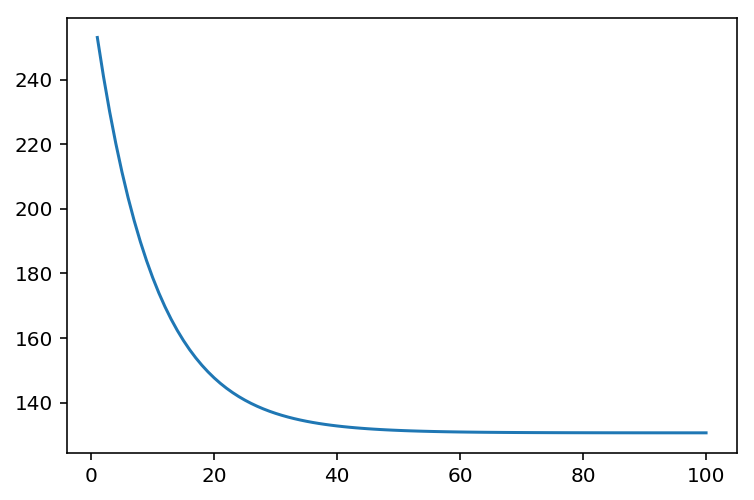

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(range(1, lrgd.n_iter+1), lrgd.cost)
plt.show()

In [7]:
import matplotlib.pyplot as plt

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

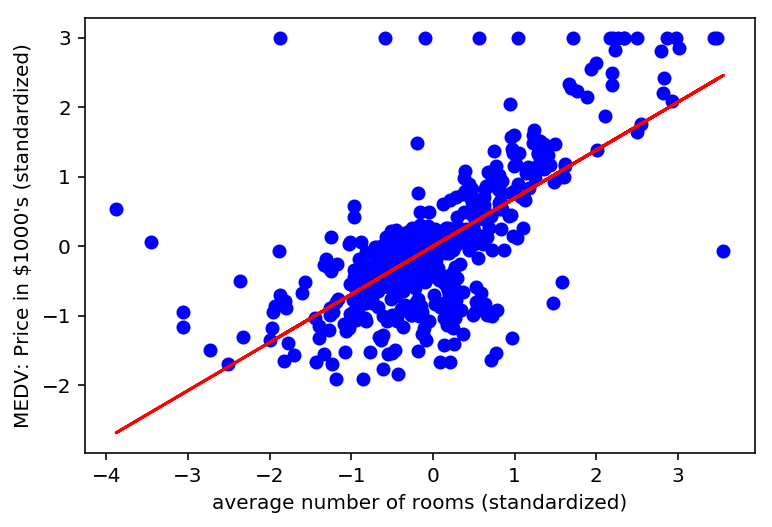

In [8]:
lin_regplot(X_std, y_std, lrgd)

plt.xlabel('average number of rooms (standardized)')
plt.ylabel('MEDV: Price in $1000\'s (standardized)')
plt.show()

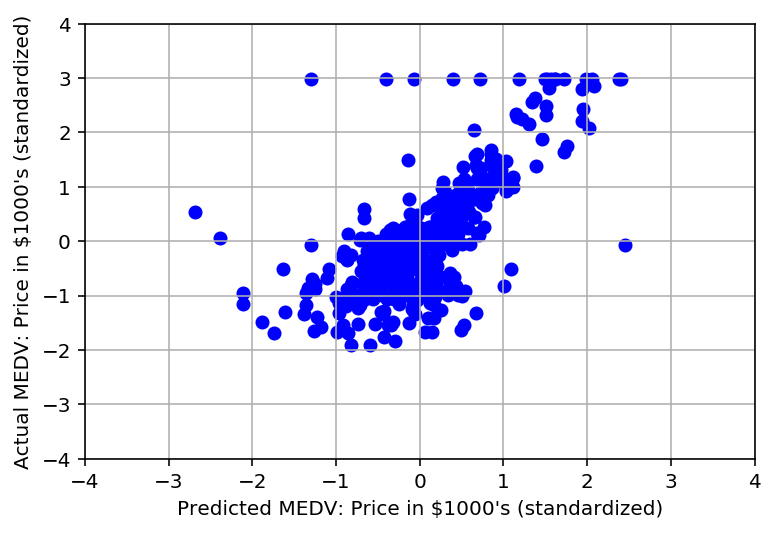

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(lrgd.predict(X_std), y_std, c='blue')
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.show()

In [10]:
num_rooms_std = sc_x.transform(np.array([5.0]).reshape(-1,1))
price_std = lrgd.predict(num_rooms_std)
print('Price in $1000\'s: %.3f' % sc_y.inverse_transform(price_std))

Price in $1000's: 10.905


In [11]:
print('Slop: %.3f' % lrgd.weight)
print('Slop: %.3f' % lrgd.bias)

Slop: 0.691
Slop: -0.000


## Implementing of Multiple linear regression model using GD(Gradient Descent)

$$\left[ \begin{array}{cccc}
\hat{y_{1}} \\
\hat{y_{2}} \\
\vdots \\
\hat{y_{n}} \\ \end{array} \right] 
=
\left[ \begin{array}{cccc}
x_{11} & x_{12}&\ldots& x_{1k}  \\
x_{21} & x_{22}&\ldots& x_{2k} \\
\vdots　&　\ldots　&\ddots &　\vdots　\\
x_{n1} & x_{n2}&\ldots& x_{nk} \\ \end{array} \right]
\cdot
\left[ \begin{array}{cccc}
w_{1} \\
w_{2} \\
\vdots \\
w_{k} \\ \end{array} \right]
+
\beta$$

$$error = 
\left[ \begin{array}{cccc}
(y_{1} - \hat{y_{1}}) \\
(y_{2} - \hat{y_{2}}) \\
\ldots \\
(y_{n} - \hat{y_{n}}) \\ \end{array} \right]$$   
  
$$cost = \frac{1}{2}\sum_{i}^{n}(y_{i} - \hat{y_{i}})^2$$  
$$\left[ \begin{array}{cccc}
\delta w_{1} \\
\delta w_{2} \\
\vdots \\
\delta w_{k} \\ \end{array} \right] 
= Learning Rate * 
\left[ \begin{array}{cccc}
x_{11} & x_{21}&\ldots& x_{n1}  \\
x_{12} & x_{22}&\ldots& x_{n2} \\
\vdots　&　\ldots　&\ddots &　\vdots　\\
x_{1k} & x_{2k}&\ldots& x_{nk} \\ \end{array} \right] 
\cdot
\left[ \begin{array}{cccc}
(y_{1} - \hat{y_{1}}) \\
(y_{2} - \hat{y_{2}}) \\
\ldots \\
(y_{n} - \hat{y_{n}}) \\ \end{array} \right]$$

$$\delta bias = Learning Rate * \sum_{i}^{n}(y_{i} - \hat{y_{i}})$$

In [12]:
from sklearn.preprocessing import StandardScaler
from LinearRegressionGD import LinearRegressionGD
Z = np.zeros((2, len(df['RM'])))
Z[0]=df['RM']
Z[1]=df['LSTAT']
Z = Z.T
y = df['MEDV'].values
y = y.reshape(-1, 1)
sc_z = StandardScaler()
sc_y = StandardScaler()

Z_std = sc_z.fit_transform(Z)
y_std = sc_y.fit_transform(y)

lrgd = LinearRegressionGD()
lrgd.fit(Z_std, y_std, lr=0.0001, n_iter=100)

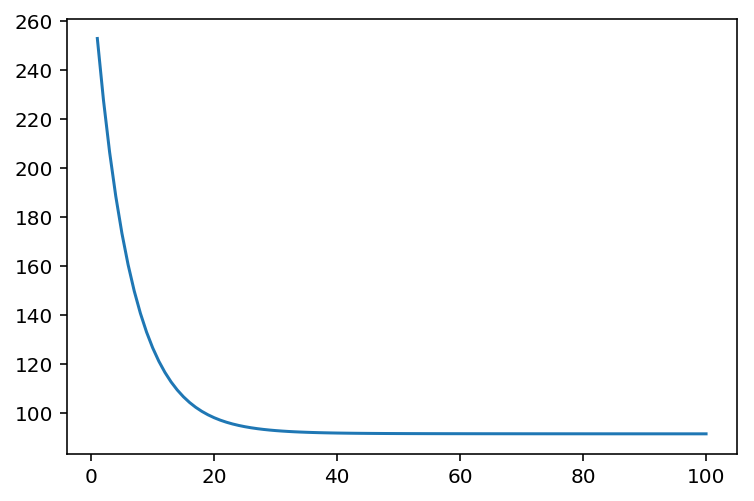

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(range(1, lrgd.n_iter+1), lrgd.cost)
plt.show()

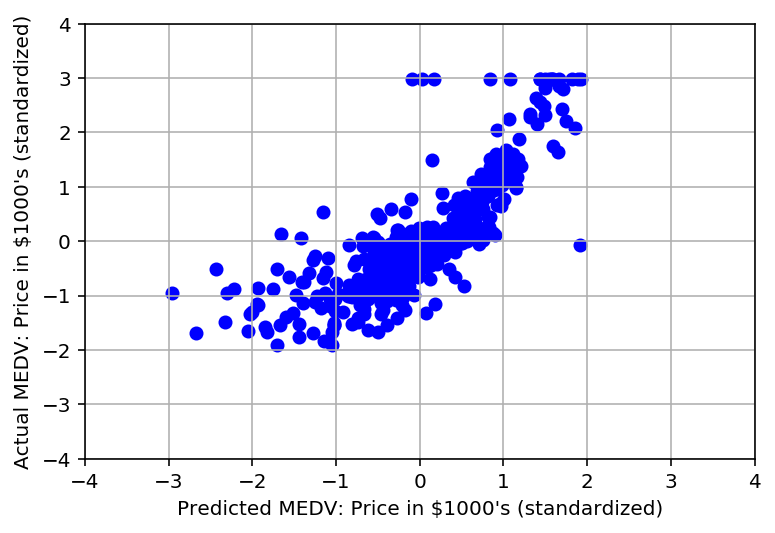

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(lrgd.predict(Z_std), y_std, c='blue')
plt.xlabel('Predicted MEDV: Price in $1000\'s (standardized)')
plt.ylabel('Actual MEDV: Price in $1000\'s (standardized)')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.show()

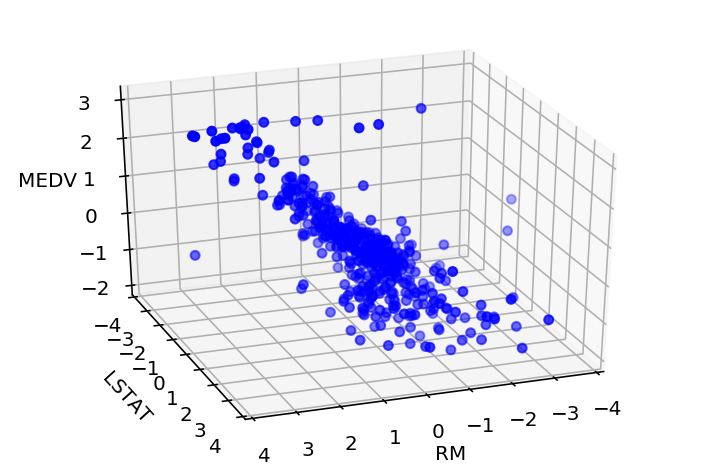

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_std.T[0], Z_std.T[1], y_std, c='blue')
ax.view_init(azim=70)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.show()

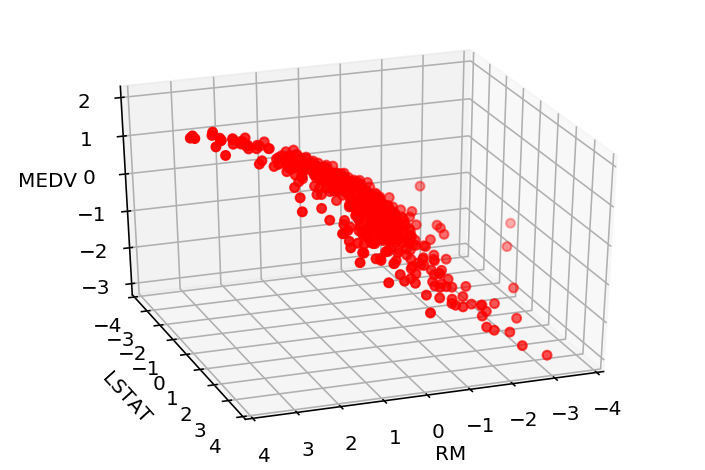

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_std.T[0], Z_std.T[1], lrgd.predict(Z_std), c='red')
ax.view_init(azim=70)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.show()

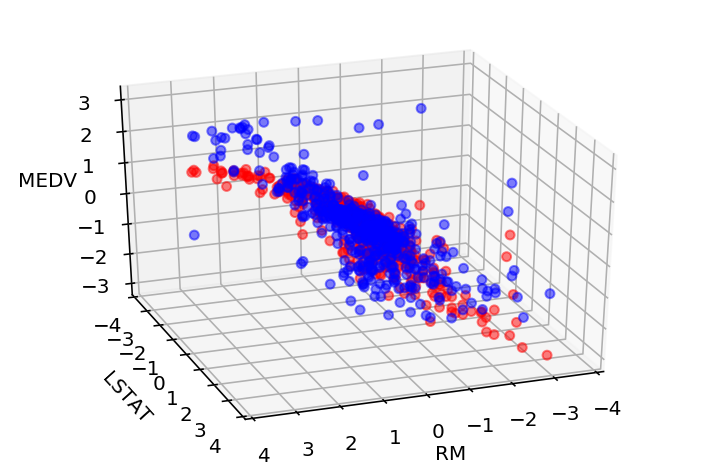

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_std.T[0], Z_std.T[1], y_std, c='blue', alpha=0.5)
ax.scatter(Z_std.T[0], Z_std.T[1], lrgd.predict(Z_std), c='red', alpha=0.5)
ax.view_init(azim=70)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.show()